<a href="https://colab.research.google.com/github/Rakshit-Sawarn-iitb/SOC/blob/main/CaptionGenerator_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'flickr8k:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F623289%2F1111676%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T053117Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5454005e05c32bf52036aa8f6dd92d3872e764ed050065a236691944b4bea7fcbd3729994ccea10313d90c6faf3bdd5108a4d36e13b7b2d65a1ffee53a5ea3190517e6e4114e85c1c1c8fc4e911badc8c7fd40fa523244a4a09e7817233ba81e22f42fe62aa7b5e5bd250f556d95ca67a8eb9684307fec6979363fab19652d625ce21eecc116b39117ab1c00a407aa63ae3ffbb40a3634c9e8ff863f679926d2e50ed0785e20d1822806f0ae6ed3614c60d00e3d53b2b222abae65c42ff5358c557649abdfc7697d3cf71937852f789c8df529625bc209079e5aeafe9d3702044763b70b330f8368718e9d14bc6dcc1561ec896007c4372dcb2579bee969e4ce,dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5389887%2F8955904%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T053117Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7cb480003754b8e9949b1bc1e2a415becafa441c0153529a264b3be0f5ebe60021984da7031f2e2676740684b9a73caa1523ac1c89575c1466c62fceb00f6ea14107df3a2222467edd27b93447201326af570682e73c229381b08449375430c115d1f81a333aec7858f847fb45f225f9aae4f63533d4cf4ee7ddd5595ed22eb8439d8507a087e267dc71ebd562e76b69182b2e9861e4d0b8ccb3cc32bbd17ab5ad3075ebab24fbd383fa635420996752d1fed756de6222dcf721927713bfdc4f458a2a2f0e9f26b0be883582821735812317a5fee15ee505f0582c6d3ed87c8564fcd993353de4c82b0dbf8e6e4a854fa697970913cf2c69320aa097805cdd1a,finalflickr:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5393037%2F8960155%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T053117Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5dbddc33a7239e2d213c82c8f6c6a3413e58fdb0b8b56272c83084740085870d1cd46baa354d5b7a11d21a19c2343c75f8ab917666d0bea8793e721694d23dcee971ce51540667b98202f3c273b347f985f1cfe1dde7f8b759d05de011ac5ad0f46e3be9f9cca2d22ba7624d72be5fd896aefdec7b100bc9ed2ee8afb4b7fbaaab7d2bacb0b409f9488867d218113e12757db1b89f20a6e78d1d6da8da5012b3023e4db889758cb0a3571aa62940092223af5b44e54e7ca96da91cff72b695da81b45de8316fd34d58a97cb257723fc17180ec26cc9ec90720bd013d1130e77e89ad60ce8487d2b46ff980614f113d1cd95a64251c143c6715b2d7d9a45cacf4,flickr8k3:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5395817%2F8964298%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T053117Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7176f0029ee41d2a37c04da1042e1b1918aff6d34db9382eaa107a8cc71d9cab81ec37f83727407ab46917bb9436b21e5c8e834c7aa6f2b7a3471a1c2eb495f4b7a30a96ebe9d980f611008f624cb1570e753b6540213404bbfe53e113aa3e232362b80a5ec627db9a7b03d8351acd6287040810fa2a99079bda1c446079b6941e148dba1f119eefd2081e8e67b09165163e87cdf516e7918a1cef775c2968b13d22c2fc409c6d59d8f21d69343e28d8fd6c4d37b478eb97aa97b851c85175d000d480aafd022370e0c2636f8c7c83a972bc7d8fbb087487ce5dc6abb36e791b92953cc7fa80baf76e06a39f4e8b0c597a28ad6edc28f3e9aa95e07393a05188,finaleflickr:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5396392%2F8965030%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T053117Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7a766cf6e167d49b50c33fefc8928066dd1214b3eebc60ab6d7f4e6aa47a54f0f47a94ee3d3b34a279cfda43ff84de143055a659c89141b6f2ecd0a0bab04f3f19c343bbaed9e2dccfa00090bdd033e8edd8dfcb1ed1c7e24e0dfaaefe421a89c96dd7057f4c7da6aeeb08829ffab39274b6f50615220e7580ae96fb0b88a6ccf2127d1420c9539840e8518cc02f1b8ff865b38c38d17abb128ce6e9f3768fa92df3fdfc9d6b0581dcab719fa839b42177dec0c2459d56e794d3defc921d669ef939dd047b4c671469f5e8e800fe90527d297b60939a331c6fd5a2a286063b860b1c10e3044b3099bed88f3a6ecd1a0d2966543e32cdfc13060e1008aa555aa0,features:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5399126%2F8968655%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T053117Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D27d0471c9e45da43247ac78afb21346c507355ff2161facaaa52417ed8e30ad28380f19477f297cfb9a0449df3853198ac39a525e61307111dca62e8f4b78109de111d4346d5b6a0f6a4606e8dfea27a3a8558fd10b3bf0ae129e21e5d08c899b548b093336b70dccb3340edd741a175e6d734d4d6b94651fb929b73823e2b801a3e9e9cd3987a71383ce9e49faa6149cff759334485857419cad3e551d43ea177923b1872a691925cfec1b3433149f268ecf4137906bd9ead9d998feaf93375d8f03ae8d150b7ad4bda9ab0156318fc280284bbac99b6abdb64532b8d10f7d7d43753cdbc97c3a373f4033b3864eaafd4f1e246670bee77f8b86b22bb7375af,finalfeatures:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5399727%2F8969473%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T053117Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D94cef0ba91a766de488f072b17f23ff4e9200ee51bb4f2ae4bba0758e2f4c7316b809675d10ac3b0599e0635633c21c8fe8188599b6412cd419a6186990fa531de7ac240f824b7f72121d6b3183cad3628966c4ebff4ca017de193de731750b80507999b58af4c9808d4bafb842efd27ad8816dcd3e84862aabe18574ff4e7fdd02a847bc434fda5b8dcde83103819e5c3c18d72a6807b018f7219f55805eb007b3e06784803a4f3662233785f77f87d5e4af050ad8ea1b29428f170fe3078d3c59e813b1b52058995377d8993b47e7f0a639b0ce3fcc1bea069d16297279ff6be773a870711c0ae54fe8f33bf49e28cdde0e4b0d9416cfc623be255cab3a560,rtyu/keras/rtyu/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F65935%2F78446%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T053117Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2225fc857dd3c27e3eeb1340c7063ae4b69a5f15e6c67b1744abbdc90f283be4bd0c14591f57dd6666582f737af902563490e277a5b39fadcebef83b27aa76b060f5a8d20e2991fce139860ce5f83cb42b3d79e353dcc23ddd9c78a3e7576c23a581e93a273481d49ea55ecf0a49655368a600e39c2da47d7c1dd0a9136e335b1f201def294396b4157031e675c23645cefd8790313dc2eda4c293f75ebb617c755de3079ab17c56223f58cfa5e7c951085fa3dcedbed475aa65d0cc5f7f92918e776beeabd36c6f46ad4f2d42116047d3ab381458752d30d4da4b9fee25dd9a5eb0da3106ac4e046e049b6d8520ab63ca6c62158bf4746424fc8bac717273ae'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1112971163 bytes downloaded
Downloaded and uncompressed: flickr8k
[==================================================] 54192767 bytes downloaded
Downloaded and uncompressed: dataset
[==================================================] 1824686 bytes downloaded
Downloaded and uncompressed: finalflickr
[==================================================] 807913 bytes downloaded
Downloaded and uncompressed: flickr8k3
[==================================================] 1104908 bytes downloaded
Downloaded and uncompressed: finaleflickr
[==================================================] 52855450 bytes downloaded
Downloaded and uncompressed: features
[==================================================] 52864062 bytes downloaded
Downloaded and uncompressed: finalfeatures
[==================================================] 61901793 bytes downloaded
Downloaded and uncompressed: rtyu/keras/rtyu/1
Data source import complete.


# **Imports**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
from PIL import Image
import numpy as np

In [3]:
from nltk.translate.bleu_score import corpus_bleu

In [4]:
from tensorflow.keras.utils import to_categorical, plot_model

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import Sequence

In [106]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Embedding,add, Add, Attention, Input, GlobalAveragePooling2D, GlobalMaxPooling2D, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
import os

In [8]:
import tensorflow as tf

In [9]:
from keras.applications.xception import Xception
from keras.models import Model

In [10]:
import string
from textblob import TextBlob
import spacy
from collections import Counter
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re

In [11]:
from collections import defaultdict
from keras.preprocessing import image
from keras.applications.xception import preprocess_input

# **Dataset Loading**

In [ ]:
image_dir = "/kaggle/input/flickr8k/Images"
captions_dir = "/kaggle/input/flickr8k/captions.txt"

In [ ]:
captions_dict = defaultdict(list)

In [ ]:
with open(captions_dir, 'r') as file:
    for line in file:
        line = line.strip()
        if not line:
            continue
        image_file, caption = line.split(',', 1)
        captions_dict[image_file].append(caption)

In [ ]:
image_paths = []
captions = []

In [ ]:
for image_file, captions_list in captions_dict.items():
    if len(captions_list) < 5:
        captions_list += [''] * (5 - len(captions_list))
    image_paths.append(f'/kaggle/input/flickr8k/Images/{image_file}')
    captions.append(captions_list[:5])

In [ ]:
data = {
    'image_path': image_paths,
    'caption_1': [cap[0] for cap in captions],
    'caption_2': [cap[1] for cap in captions],
    'caption_3': [cap[2] for cap in captions],
    'caption_4': [cap[3] for cap in captions],
    'caption_5': [cap[4] for cap in captions],
}

In [ ]:
df = pd.DataFrame(data)
df = df.drop(index=0)
df.head()

,image_path,caption_1,caption_2,caption_3,caption_4,caption_5
1,/kaggle/input/flickr8k/Images/1000268201_693b0...,A child in a pink dress is climbing up a set o...,A girl going into a wooden building .,A little girl climbing into a wooden playhouse .,A little girl climbing the stairs to her playh...,A little girl in a pink dress going into a woo...
2,/kaggle/input/flickr8k/Images/1001773457_577c3...,A black dog and a spotted dog are fighting,A black dog and a tri-colored dog playing with...,A black dog and a white dog with brown spots a...,Two dogs of different breeds looking at each o...,Two dogs on pavement moving toward each other .
3,/kaggle/input/flickr8k/Images/1002674143_1b742...,A little girl covered in paint sits in front o...,A little girl is sitting in front of a large p...,A small girl in the grass plays with fingerpai...,There is a girl with pigtails sitting in front...,Young girl with pigtails painting outside in t...
4,/kaggle/input/flickr8k/Images/1003163366_44323...,A man lays on a bench while his dog sits by him .,A man lays on the bench to which a white dog i...,a man sleeping on a bench outside with a white...,A shirtless man lies on a park bench with his ...,man laying on bench holding leash of dog sitti...
5,/kaggle/input/flickr8k/Images/1007129816_e7944...,A man in an orange hat starring at something .,A man wears an orange hat and glasses .,A man with gauges and glasses is wearing a Bli...,A man with glasses is wearing a beer can croch...,The man with pierced ears is wearing glasses a...


In [ ]:
print(len(df))

8091


> **Just to confirm that there is no null value**

In [ ]:
df.isnull().sum()

image_path    0
caption_1     0
caption_2     0
caption_3     0
caption_4     0
caption_5     0
dtype: int64

In [ ]:
df.to_csv('Flickr8K3.csv', index=False)
print("DataFrame saved as 'Flickr8K3.csv'")

DataFrame saved as 'Flickr8K3.csv'


In [ ]:
df = pd.read_csv("/kaggle/input/flickr8k3/Flickr8K3 (1).csv")
df.head()

,image_path,caption_1,caption_2,caption_3,caption_4,caption_5
0,/kaggle/input/flickr8k/Images/1000268201_693b0...,A child in a pink dress is climbing up a set o...,A girl going into a wooden building .,A little girl climbing into a wooden playhouse .,A little girl climbing the stairs to her playh...,A little girl in a pink dress going into a woo...
1,/kaggle/input/flickr8k/Images/1001773457_577c3...,A black dog and a spotted dog are fighting,A black dog and a tri-colored dog playing with...,A black dog and a white dog with brown spots a...,Two dogs of different breeds looking at each o...,Two dogs on pavement moving toward each other .
2,/kaggle/input/flickr8k/Images/1002674143_1b742...,A little girl covered in paint sits in front o...,A little girl is sitting in front of a large p...,A small girl in the grass plays with fingerpai...,There is a girl with pigtails sitting in front...,Young girl with pigtails painting outside in t...
3,/kaggle/input/flickr8k/Images/1003163366_44323...,A man lays on a bench while his dog sits by him .,A man lays on the bench to which a white dog i...,a man sleeping on a bench outside with a white...,A shirtless man lies on a park bench with his ...,man laying on bench holding leash of dog sitti...
4,/kaggle/input/flickr8k/Images/1007129816_e7944...,A man in an orange hat starring at something .,A man wears an orange hat and glasses .,A man with gauges and glasses is wearing a Bli...,A man with glasses is wearing a beer can croch...,The man with pierced ears is wearing glasses a...


# **Text Preprocessing**

In [ ]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [ ]:
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def removePunc(text):
    return text.translate(str.maketrans('','',exclude))

In [ ]:
def remove_whitespace(column):
    return column.str.strip

In [ ]:
def startend(text):
    text = 'startseq ' + " ".join([word for word in text.split() if len(word)>1]) + ' endseq'
    return text

In [ ]:
df['caption_1'] = df['caption_1'].str.lower()
df['caption_2'] = df['caption_2'].str.lower()
df['caption_3'] = df['caption_3'].str.lower()
df['caption_4'] = df['caption_4'].str.lower()
df['caption_5'] = df['caption_5'].str.lower()

In [ ]:
df['caption_1'] = df['caption_1'].apply(remove_html_tags)
df['caption_2'] = df['caption_2'].apply(remove_html_tags)
df['caption_3'] = df['caption_3'].apply(remove_html_tags)
df['caption_4'] = df['caption_4'].apply(remove_html_tags)
df['caption_5'] = df['caption_5'].apply(remove_html_tags)

In [ ]:
df['caption_1'] = df['caption_1'].apply(removePunc)
df['caption_2'] = df['caption_2'].apply(removePunc)
df['caption_3'] = df['caption_3'].apply(removePunc)
df['caption_4'] = df['caption_4'].apply(removePunc)
df['caption_5'] = df['caption_5'].apply(removePunc)

In [ ]:
df['caption_1'] = df['caption_1'].str.strip()
df['caption_2'] = df['caption_2'].str.strip()
df['caption_3'] = df['caption_3'].str.strip()
df['caption_4'] = df['caption_4'].str.strip()
df['caption_5'] = df['caption_5'].str.strip()

In [ ]:
df['caption_1_final'] = df['caption_1'].apply(startend)
df['caption_2_final'] = df['caption_2'].apply(startend)
df['caption_3_final'] = df['caption_3'].apply(startend)
df['caption_4_final'] = df['caption_4'].apply(startend)
df['caption_5_final'] = df['caption_5'].apply(startend)

In [ ]:
df.head()

,image_path,caption_1,caption_2,caption_3,caption_4,caption_5,caption_1_final,caption_2_final,caption_3_final,caption_4_final,caption_5_final
0,/kaggle/input/flickr8k/Images/1000268201_693b0...,a child in a pink dress is climbing up a set o...,a girl going into a wooden building,a little girl climbing into a wooden playhouse,a little girl climbing the stairs to her playh...,a little girl in a pink dress going into a woo...,startseq child in pink dress is climbing up se...,startseq girl going into wooden building endseq,startseq little girl climbing into wooden play...,startseq little girl climbing the stairs to he...,startseq little girl in pink dress going into ...
1,/kaggle/input/flickr8k/Images/1001773457_577c3...,a black dog and a spotted dog are fighting,a black dog and a tricolored dog playing with ...,a black dog and a white dog with brown spots a...,two dogs of different breeds looking at each o...,two dogs on pavement moving toward each other,startseq black dog and spotted dog are fightin...,startseq black dog and tricolored dog playing ...,startseq black dog and white dog with brown sp...,startseq two dogs of different breeds looking ...,startseq two dogs on pavement moving toward ea...
2,/kaggle/input/flickr8k/Images/1002674143_1b742...,a little girl covered in paint sits in front o...,a little girl is sitting in front of a large p...,a small girl in the grass plays with fingerpai...,there is a girl with pigtails sitting in front...,young girl with pigtails painting outside in t...,startseq little girl covered in paint sits in ...,startseq little girl is sitting in front of la...,startseq small girl in the grass plays with fi...,startseq there is girl with pigtails sitting i...,startseq young girl with pigtails painting out...
3,/kaggle/input/flickr8k/Images/1003163366_44323...,a man lays on a bench while his dog sits by him,a man lays on the bench to which a white dog i...,a man sleeping on a bench outside with a white...,a shirtless man lies on a park bench with his dog,man laying on bench holding leash of dog sitti...,startseq man lays on bench while his dog sits ...,startseq man lays on the bench to which white ...,startseq man sleeping on bench outside with wh...,startseq shirtless man lies on park bench with...,startseq man laying on bench holding leash of ...
4,/kaggle/input/flickr8k/Images/1007129816_e7944...,a man in an orange hat starring at something,a man wears an orange hat and glasses,a man with gauges and glasses is wearing a bli...,a man with glasses is wearing a beer can croch...,the man with pierced ears is wearing glasses a...,startseq man in an orange hat starring at some...,startseq man wears an orange hat and glasses e...,startseq man with gauges and glasses is wearin...,startseq man with glasses is wearing beer can ...,startseq the man with pierced ears is wearing ...


In [ ]:
df.to_csv('finaleflickr.csv', index=False)

# **Extracting feature vectors from images**

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, pooling='avg')

In [ ]:
model = Model(inputs=base_model.input, outputs=base_model.output)

In [ ]:
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, None,      │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, None,      │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, None,      │          0 │ block1_conv1_bn[… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, None,      │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, None,      │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, None,      │          0 │ block1_conv2_bn[… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, None,      │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, None,      │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, None,      │          0 │ block2_sepconv1_… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, None,      │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, None,      │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │      8,192 │ block1_conv2_act… │
│                     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, None,      │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, None,      │          0 │ block2_pool[0][0… │
│                     │ None, 128)        │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, None,      │          0 │ add_12[0][0]    

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

None


In [ ]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
    img_array = preprocess_input(img_array)
    return img_array

In [ ]:
def extract_features(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    features = model.predict(img_array, verbose = 0)
    return features

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [ ]:
features = []

In [ ]:
for i in range(0,(len(df))):
    img_path = df.iloc[i]['image_path']
    feature = extract_features(img_path, model)
    features.append(feature)
print(features)

In [ ]:
print(features)

In [ ]:
features_array = np.array(features)
np.save('features5.npy', features_array)

# **Tokenising the vocabulary**

In [12]:
df = pd.read_csv("/kaggle/input/finaleflickr/finaleflickr.csv")

In [13]:
df.head()

,image_path,caption_1,caption_2,caption_3,caption_4,caption_5,caption_1_final,caption_2_final,caption_3_final,caption_4_final,caption_5_final
0,/kaggle/input/flickr8k/Images/1000268201_693b0...,a child in a pink dress is climbing up a set o...,a girl going into a wooden building,a little girl climbing into a wooden playhouse,a little girl climbing the stairs to her playh...,a little girl in a pink dress going into a woo...,startseq child in pink dress is climbing up se...,startseq girl going into wooden building endseq,startseq little girl climbing into wooden play...,startseq little girl climbing the stairs to he...,startseq little girl in pink dress going into ...
1,/kaggle/input/flickr8k/Images/1001773457_577c3...,a black dog and a spotted dog are fighting,a black dog and a tricolored dog playing with ...,a black dog and a white dog with brown spots a...,two dogs of different breeds looking at each o...,two dogs on pavement moving toward each other,startseq black dog and spotted dog are fightin...,startseq black dog and tricolored dog playing ...,startseq black dog and white dog with brown sp...,startseq two dogs of different breeds looking ...,startseq two dogs on pavement moving toward ea...
2,/kaggle/input/flickr8k/Images/1002674143_1b742...,a little girl covered in paint sits in front o...,a little girl is sitting in front of a large p...,a small girl in the grass plays with fingerpai...,there is a girl with pigtails sitting in front...,young girl with pigtails painting outside in t...,startseq little girl covered in paint sits in ...,startseq little girl is sitting in front of la...,startseq small girl in the grass plays with fi...,startseq there is girl with pigtails sitting i...,startseq young girl with pigtails painting out...
3,/kaggle/input/flickr8k/Images/1003163366_44323...,a man lays on a bench while his dog sits by him,a man lays on the bench to which a white dog i...,a man sleeping on a bench outside with a white...,a shirtless man lies on a park bench with his dog,man laying on bench holding leash of dog sitti...,startseq man lays on bench while his dog sits ...,startseq man lays on the bench to which white ...,startseq man sleeping on bench outside with wh...,startseq shirtless man lies on park bench with...,startseq man laying on bench holding leash of ...
4,/kaggle/input/flickr8k/Images/1007129816_e7944...,a man in an orange hat starring at something,a man wears an orange hat and glasses,a man with gauges and glasses is wearing a bli...,a man with glasses is wearing a beer can croch...,the man with pierced ears is wearing glasses a...,startseq man in an orange hat starring at some...,startseq man wears an orange hat and glasses e...,startseq man with gauges and glasses is wearin...,startseq man with glasses is wearing beer can ...,startseq the man with pierced ears is wearing ...


In [17]:
all_captions = []
for i in range(len(df)):
    for j in range(6,11):
        all_captions.append(df.iloc[i][j])

In [18]:
print(len(all_captions))

40455


In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [20]:
max_length = max(len(caption.split()) for caption in all_captions)

In [21]:
print(f"Vocab Size:{vocab_size}, Max Length:{max_length}")

Vocab Size:8811, Max Length:34


In [22]:
captions_array = np.array(all_captions)
np.save('all_captions.npy', captions_array)

# **Data Generator**

In [29]:
def ImageGenerator(df, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for k in range(len(df)):
            n += 1
            captions = []
            captions.append(df.iloc[k]['caption_1_final'])
            captions.append(df.iloc[k]['caption_2_final'])
            captions.append(df.iloc[k]['caption_3_final'])
            captions.append(df.iloc[k]['caption_4_final'])
            captions.append(df.iloc[k]['caption_5_final'])
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    X1.append(features[k].flatten())
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield ((X1, X2), y)
                X1, X2, y = list(), list(), list()
                n = 0

In [30]:
def check_multiple_samples(generator, num_batches=1, num_samples=5):
    for _ in range(num_batches):
        (X1, X2), y = next(generator)
        print("X1 (image features) shape:", X1.shape)
        print("X2 (input sequences) shape:", X2.shape)
        print("y (output sequences) shape:", y.shape)

        for i in range(num_samples):
            print(f"\nSample {i+1}:")
            print("X1 (image features):", X1[i])
            print("X2 (input sequences):", X2[i])
            print("y (output sequences):", y[i])
            print("Indices of 1 in y sample:", np.where(y[i] == 1))

        break

# Example usage
# Assuming df, features, tokenizer, max_length, vocab_size, and batch_size are already defined
generator = ImageGenerator(df, features_array, tokenizer, max_length, vocab_size, batch_size=32)
check_multiple_samples(generator, num_batches=1, num_samples=5)

X1 (image features) shape: (1746, 2048)
X2 (input sequences) shape: (1746, 34)
y (output sequences) shape: (1746, 8811)

Sample 1:
X1 (image features): [0.35919985 0.03271872 0.03685762 ... 0.13819925 0.0285805  0.3070874 ]
X2 (input sequences): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
y (output sequences): [0. 0. 0. ... 0. 0. 0.]
Indices of 1 in y sample: (array([41]),)

Sample 2:
X1 (image features): [0.35919985 0.03271872 0.03685762 ... 0.13819925 0.0285805  0.3070874 ]
X2 (input sequences): [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1 41]
y (output sequences): [0. 0. 0. ... 0. 0. 0.]
Indices of 1 in y sample: (array([3]),)

Sample 3:
X1 (image features): [0.35919985 0.03271872 0.03685762 ... 0.13819925 0.0285805  0.3070874 ]
X2 (input sequences): [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1 41  3]
y (output sequences): [0. 0. 0. ... 0. 0. 0.]
Ind

# **CNN-LSTM model**

In [107]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(512, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 512, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(512)(se2)


decoder1 = add([fe2, se3])
decoder2 = Dense(512, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [104]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(1024, activation='relu')(fe1)  # Projecting to the same dimension as LSTM output

# Sequence model
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 512, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = Bidirectional(LSTM(512, return_sequences=True))(se2)  # Bidirectional LSTM

# Define Attention mechanism
# Tile the feature vector to match the sequence length
fe2_expanded = tf.expand_dims(fe2, 1)
fe2_tiled = tf.tile(fe2_expanded, [1, max_length, 1])

attention = Attention()([se3, fe2_tiled])
combined_features = Add()([attention, se3])
decoder1 = Dense(512, activation='relu')(combined_features)
outputs = Dense(vocab_size, activation='softmax')(decoder1)

In [99]:
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [100]:
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=2, min_lr=1e-6)

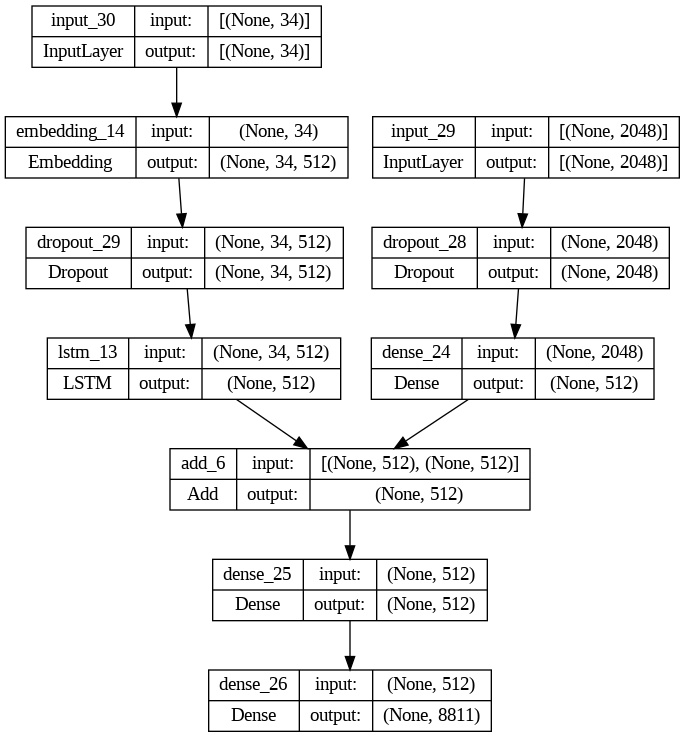

In [108]:
plot_model(model, show_shapes=True)

In [90]:
features_array = np.load('/kaggle/input/finalfeatures/features3.npy')

In [91]:
print(features_array)

[[[3.5919985e-01 3.2718718e-02 3.6857616e-02 ... 1.3819925e-01
   2.8580498e-02 3.0708739e-01]]

 [[0.0000000e+00 2.1514879e-01 4.0346861e-04 ... 2.0985599e-01
   3.9448452e-01 3.6870800e-02]]

 [[0.0000000e+00 6.7934223e-02 2.6882542e-02 ... 0.0000000e+00
   4.5634706e-02 5.6684051e-02]]

 ...

 [[1.2254698e-01 0.0000000e+00 6.0160499e-02 ... 3.2083619e-01
   2.1130087e-02 1.8194318e-04]]

 [[2.5183994e-01 1.8707456e-02 1.3965242e-01 ... 0.0000000e+00
   0.0000000e+00 2.9523957e-03]]

 [[7.6684761e-03 0.0000000e+00 0.0000000e+00 ... 1.2547281e-02
   2.3067098e-03 8.0255575e-02]]]


In [92]:
print(features_array[4].flatten().shape)

(2048,)


In [ ]:
epochs = 30
batch_size = 32
steps = len(df) // batch_size

for i in range(epochs):
    generator = ImageGenerator(df, features_array, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1, callbacks=[early_stopping,lr_reduction])

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
model.save('/content/drive/MyDrive/caption_model7.h5')

# **Testing**

In [109]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/caption_model7.h5')

In [110]:
def predict_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [111]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = predict_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
    return in_text

In [115]:
import random

def generate_random_list(length, max_value):
    return [random.randint(0, max_value) for _ in range(length)]

# Example usage
desired_length = 500
max_value = len(df)

random_list = generate_random_list(desired_length, max_value)
print(random_list)

[799, 4045, 7235, 7603, 3020, 3421, 7720, 4121, 3377, 5787, 4257, 4207, 2761, 5545, 5298, 4078, 3888, 7869, 6562, 6340, 4444, 3375, 1455, 6087, 2653, 1919, 3120, 4608, 5393, 3607, 4907, 982, 5752, 2218, 6696, 3307, 4544, 3857, 6492, 3427, 4118, 7020, 6726, 4711, 1577, 1916, 5425, 1713, 1002, 4271, 1413, 7611, 5925, 4210, 1569, 4999, 2434, 4727, 40, 4634, 5836, 5267, 5810, 4587, 1053, 3713, 1776, 2298, 4231, 3286, 3331, 7858, 7270, 2340, 6629, 6054, 203, 6392, 3407, 3670, 1564, 6763, 4750, 1931, 5158, 2146, 904, 1842, 3886, 407, 5244, 565, 1570, 3492, 148, 848, 3438, 5980, 2256, 6488, 5834, 837, 7975, 2851, 4544, 207, 1011, 5997, 7615, 5750, 5439, 263, 2302, 5258, 8074, 6915, 1619, 3771, 5299, 7694, 116, 949, 6199, 5933, 4144, 233, 4914, 1777, 4503, 2609, 6830, 6085, 2137, 2647, 7609, 4066, 1521, 4354, 6986, 6330, 7569, 4522, 1132, 5040, 4855, 7927, 6906, 1402, 613, 5808, 7931, 109, 1023, 6609, 1967, 4357, 7519, 1851, 7309, 2240, 7097, 5029, 7979, 6195, 4140, 2153, 4909, 3350, 7084, 108

In [116]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for i in random_list:
    # get actual caption
    captions = []
    for k in range(6,11):
        captions.append(df.iloc[i][k])
    # predict the caption for image
    y_pred = predict_caption(loaded_model, features_array[i], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

BLEU-1: 0.619665
BLEU-2: 0.413758


In [47]:
def generate_caption(index):
    image = Image.open(df.iloc[index][0])
    y_pred = predict_caption(model, features_array[index], tokenizer, max_length)
    return y_pred,image

In [69]:
predicted, picture = generate_caption(4)

In [70]:
print(predicted)

startseq man with beard and sunglasses is standing in crowd endseq


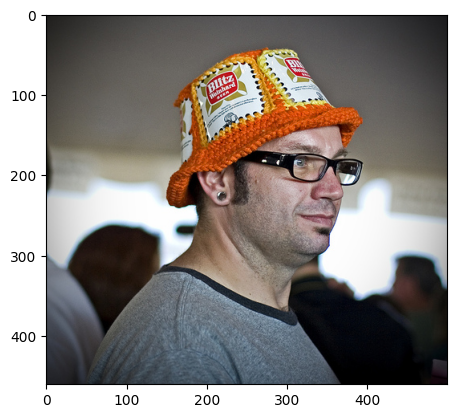

In [71]:
plt.imshow(picture)